Given the dataset of 30 students' study hours and exam scores, how would you build a linear regression model to predict exam scores? Describe the steps you would take to diagnose the regression model, including checking assumptions, identifying outliers, and handling influential points. Finally, evaluate the model's performance and discuss any insights gained.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [19]:
df=pd.read_csv('Student_Data.csv')
df.head()

,StudyHours,ExamScore
0,5,66.938936
1,3,58.791081
2,7,73.818557
3,4,59.844898
4,6,69.690213


linear regression model to predict exam scores

In [3]:
X = df[['StudyHours']]
y = df['ExamScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.predict([[30]]))
print(model.coef_)
print(model.intercept_)

[187.0778994]
[4.83239711]
42.10598610587485


c:\Users\keert\anaconda3\envs\test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evaluate the model

In [4]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1.9754181538702251
Mean Squared Error (MSE): 6.353087473532352
Root Mean Squared Error (RMSE): 2.5205331724721165
R-squared: 0.9710368865999279


Diagnose the model

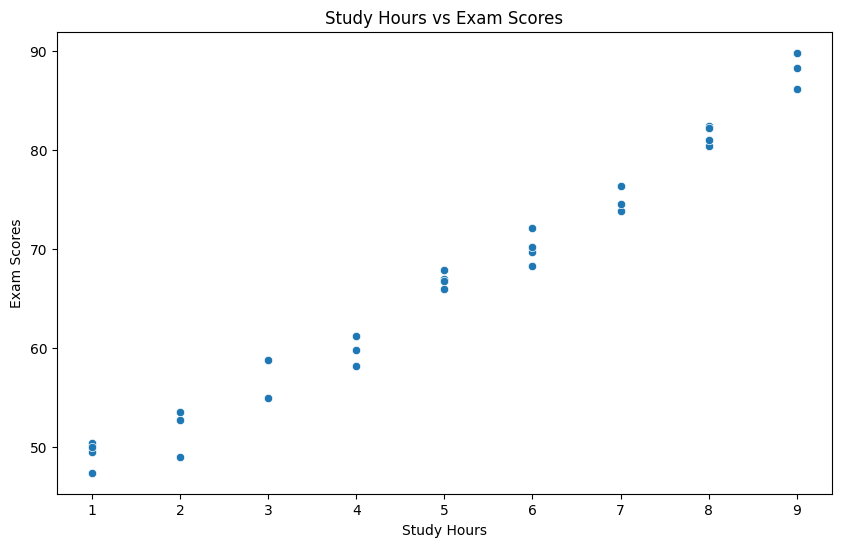

In [9]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='StudyHours', y='ExamScore', data=df)
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.show()

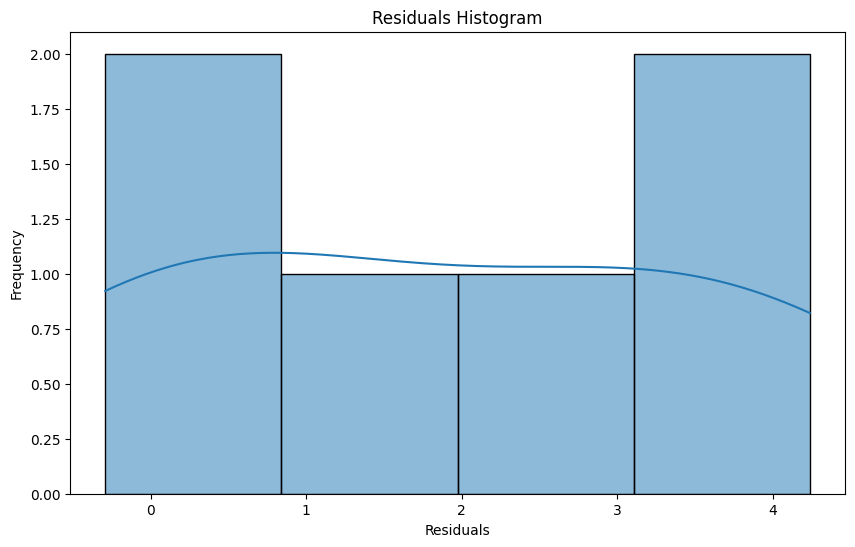

In [15]:
# Check residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

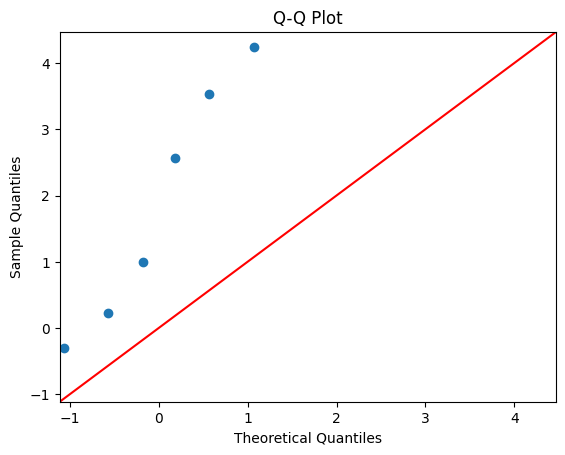

In [25]:
# Q-Q plot for normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

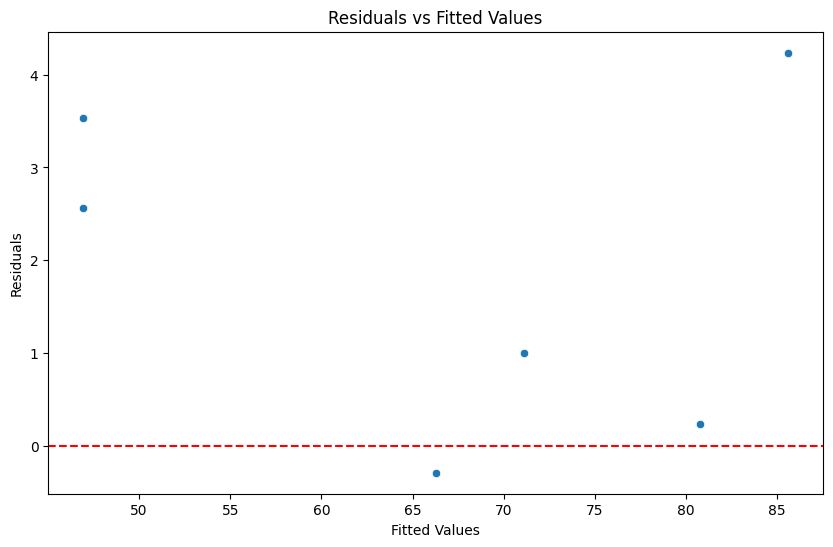

In [17]:
# Residuals vs Fitted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

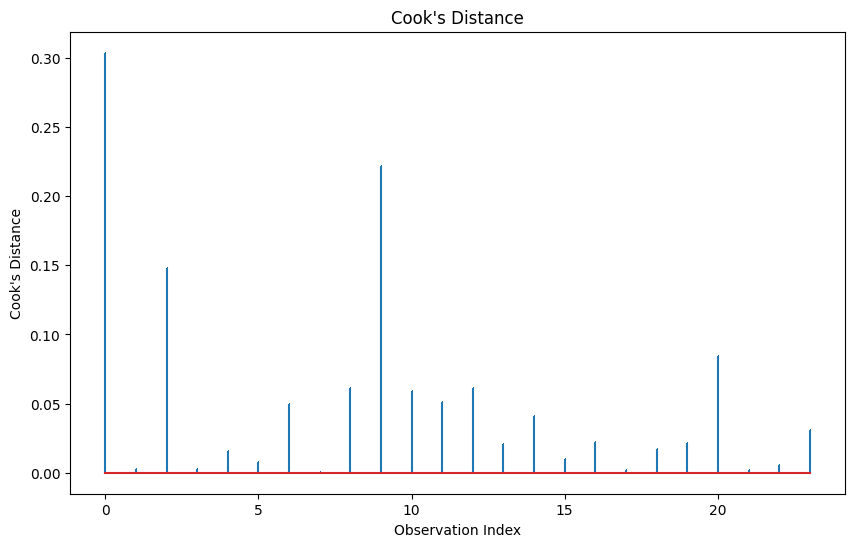

In [9]:
# Check for outliers and influential points
influence = sm.OLS(y_train, sm.add_constant(X_train)).fit().get_influence()
(c, p) = influence.cooks_distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Cook\'s Distance')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.show()